### ***2***

##BATCH GRADIENT DESCENT AND L2 NORM REGULARISATION


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 

In [ ]:
path = '/content/drive/MyDrive/ML/data_q2_q3.xlsx'
df = pd.read_excel(path)
insts = df.to_numpy()
m= len(insts[:,0])
ones = np.ones((m,1))
insts= np.append(ones,insts,axis=1)
n= len(insts[0,:])-1 # Number of features
y_mean = insts[:,n-1].mean()
y_std = insts[:,n-1].std()
# normaliziing our instinces
for i in range(1,n,1):
  insts[:,i] = (insts[:,i]-insts[:,i].mean())/insts[:,i].std()
# Assigning the hiperparameters
itr = 2000
insts_mb = insts.copy()
insts_s = insts.copy()
np.random.shuffle(insts)
insts_tr = insts[0:int(m*0.7),:]
insts_te = insts[int(m*0.7):int(m*0.9),:]
insts_val = insts[int(m*0.9):m,:]

In [ ]:
#hypothesis vector for a particular set of weight values
def hypothesis(w,insts,m):
  h = np.ones(m)
  for i in range(m):
    h[i] = w[0] + w[1]*insts[i,1] + w[2]*insts[i,2] + w[3]*insts[i,3] + w[4]*insts[i,4]
  return h

#updating weight values
def update(w,alpha,lamb,insts,m,h):
  d = [0,0,0,0,0]
  n = len(insts[0,:])
  for i in range(0,5):
    for j in range(0,m):
      d[i] = d[i] + ((h[j] - insts[j,5])*insts[j,i])
  for i in range(5):
    w[i] = w[i]*(1 - alpha*lamb) - alpha*d[i]
  return w

def update_stotastic(w,alpha,m,insts,h,i,lamb):
  for n in range(5):
    w[n] = w[n]*(1-alpha*lamb) - alpha*(h[i]-insts[i,5])*insts[i,n]
  return w

#cost functiom
def cost(h,insts,lamb,m,w):
    j=0
    for i in range(0,m):
      j = j + 0.5*((h[i]-insts[i,5])**2)
    
    return (j + 0.5*lamb*(np.dot(w,w)))

#mean square error
def calc_mse(m,h,y):
  e = 0
  for i in range(0,m):
    e = e + (h[i]- y[i])**2
  e=e/m
  return e

def calc_mae(m,h,y):
  e = 0
  for i in range(m):
    e = e + abs(h[i]-y[i])
  return e/m

def calc_cc(m,h,h_m,y,y_m):
  a = ((y - y_m)*(h - h_m)).sum()
  b = ((y - y_m)**2).sum()
  c = ((h - h_m)**2).sum()
  d = (b*c)**0.5
  return a/d

In [ ]:
m_tr = len(insts_tr[:,0])
m_val = len(insts_val[:,0])
lamb = np.linspace(0 , 100,10) #creating a list of alphas 
alpha = np.linspace(0.00001,0.0001,10) # list of lambda
b_min = 10000 # for storing the min cost for validation data
c = np.ones(len(lamb)) # for temporarily storing the validation cost value in each iteration
w_opt = np.zeros(len(insts_tr[0,:])-1) # storing the optimal weight value 
j_opt = np.zeros(itr) # storing the optimal cost value list
min = 0 
for i in range(len(lamb)):
  for a in alpha:
    w = np.random.rand(5)
    j_list = np.ones(itr)
    for j in range(itr):
      h = hypothesis(w,insts_tr,m_tr)
      w = update(w,a,lamb[i],insts_tr,m_tr,h)
      j_list[j] = cost(h,insts_tr,lamb[i],m_tr,w)
    h = hypothesis(w,insts_val,m_val)
    c[i] = cost(h,insts_val,lamb[i],m_val,w)
    if c[i]< b_min:
      min = i
      b_min = c[i]
      w_opt = w
      j_opt = j_list

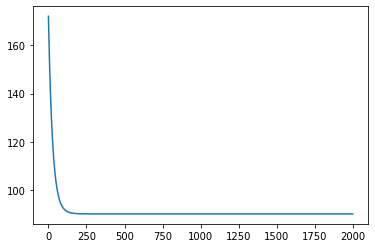

In [ ]:
x = np.arange(itr)
plt.plot(x,j_list)
plt.show()

In [ ]:
print(j_opt[itr-1])
print(w_opt)

4.295020469597913
[ 1.92182652  0.39176273 -0.0179953   0.06356422  0.13200417]


In [ ]:
# mse for test data
m_te = len(insts_te[:,0])
h_te = (hypothesis(w_opt,insts_te,m_te)*y_std)+ y_mean
y = (insts_te[:,5]*y_std) + y_mean
mse = calc_mse(m_te,h_te,y)
print('Final weight values:',end=' ')
print(w)
print('MSE for BGD:' , end= " ")
print(mse)
# clculation of mae
mae = calc_mae(m_te,h_te,y)
print('MAE for BGD:', end = ' ')
print(mae)

# calcculation of cc
y_m = y.mean()
h_m = h_te.mean()
cc = calc_cc(m_te,h_te,h_m,y,y_m)
print('CC for BGD:', end = ' ')
print(cc)

Final weight values: [ 0.85296969  0.16592018 -0.01610744  0.01840449  0.03074851]
MSE for BGD: 0.027800920560488687
MAE for BGD: 0.14373582347145786
CC for BGD: 0.8919154446556182


##MINI BATCH GRADIENT DESCENT AND  L2 NORM REGULARISATION

In [ ]:
itr = 1000
np.random.shuffle(insts_mb)
insts_tr = insts_mb[0:int(m*0.7),:]
insts_te = insts_mb[int(m*0.7):int(m*0.9),:]
insts_val = insts_mb[int(m*0.9):m,:]

In [ ]:
m_tr = len(insts_tr[:,0])
m_val = len(insts_val[:,0])
lamb = np.linspace(0 , 100,10) #creating a list of alphas 
alpha = np.linspace(0.0001,0.001,10) # list of lambda
b_min = 10000 # for storing the min cost for validation data
c = np.ones(len(lamb)) # for temporarily storing the validation cost value in each iteration
w_opt = np.zeros(len(insts_tr[0,:])-1) # storing the optimal weight value 
j_opt = np.zeros(itr) # storing the optimal cost value list
min = 0
m_batch = 10 #batch size 
for i in range(len(lamb)):
  for a in alpha:
    w = np.random.rand(5)
    j_list = np.ones(itr)
    for j in range(0,itr):
      np.random.shuffle(insts_tr)
      h = hypothesis(w,insts_tr,m_tr)
      w = update(w,a,lamb[i],insts_tr,m_batch,h) # sending the batch size to the update function
      j_list[j] = cost(h,insts_tr,lamb[i],m_tr,w)
    h = hypothesis(w,insts_val,m_val)
    c[i] = cost(h,insts_val,lamb[i],m_val,w)
    if c[i]< b_min:
      min = i
      b_min = c[i]
      w_opt = w
      j_opt = j_list

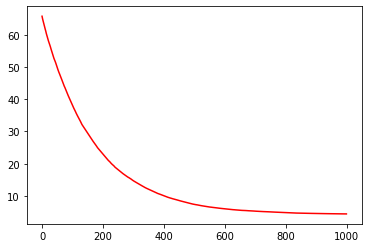

In [ ]:
x = np.arange(itr)
plt.plot(x,j_opt,'red')
plt.show()

In [ ]:
# calc mse for test data
m_te = len(insts_te[:,0])
h_te = (hypothesis(w_opt,insts_te,m_te)*y_std)+ y_mean
y = (insts_te[:,5]*y_std) + y_mean
mse = calc_mse(m_te,h_te,y)
print('Final weight values:',end=' ')
print(w)
print('MSE for MBG:',end= ' ')
print(mse)
# clculation of mae
mae = calc_mae(m_te,h_te,y)
print('MAE for MBG:', end = ' ')
print(mae)

# calcculation of cc
y_m = y.mean()
h_m = h_te.mean()
cc = calc_cc(m_te,h_te,h_m,y,y_m)
print('CC for MBG:', end = ' ')
print(cc)

Final weight values: [ 0.17080682  0.02911659 -0.00108137  0.0295722  -0.00095907]
MSE for MBG: 0.035586647037407465
MAE for MBG: 0.1652559309635748
CC for MBG: 0.8314553290332052


##STOCHASTIC GRADIENT DESCENT AND  L2 NORM REGULARISATON

In [ ]:
itr = 500
np.random.shuffle(insts_s)
insts_tr = insts_s[0:int(m*0.7),:]
insts_te = insts_s[int(m*0.7):int(m*0.9),:]
insts_val = insts_s[int(m*0.9):m,:]

In [ ]:
m_tr = len(insts_tr[:,0])
m_val = len(insts_val[:,0])
lamb = np.linspace(0 , 100,10) #creating a list of alphas 
alpha = np.linspace(0.0001,0.005,10) # list of lambda
b_min = 10000 # for storing the min cost for validation data
c = np.ones(len(lamb)) # for temporarily storing the validation cost value in each iteration
w_opt = np.zeros(len(insts_tr[0,:])-1) # storing the optimal weight value 
j_opt = np.zeros(itr) # storing the optimal cost value list
min = 0
for i in range(len(lamb)): #Using grid search for alpha and lambda
  for a in alpha:
    w = np.random.rand(5)
    j_list = np.ones(itr)
    for j in range(itr):
      index = np.random.randint(0,m_tr)
      h = hypothesis(w,insts_tr,m_tr)
      w = update_stotastic(w,a,m_tr,insts_tr,h,index,lamb[i])
      j_list[j] = cost(h,insts_tr,lamb[i],m_tr,w)
    h = hypothesis(w,insts_val,m_val)
    c[i] = cost(h,insts_val,lamb[i],m_val,w)
    if c[i]< b_min:
      min = i
      b_min = c[i]
      w_opt = w
      j_opt = j_list

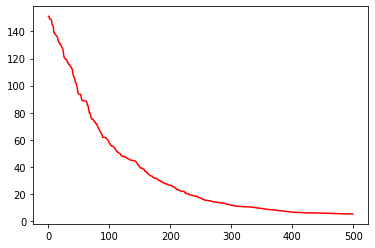

In [ ]:
x = np.arange(itr)
plt.plot(x,j_opt,'red')
plt.show()

In [ ]:
# calc mse for test data
m_te = len(insts_te[:,0])
h_te = (hypothesis(w_opt,insts_te,m_te)*y_std)+ y_mean
y = (insts_te[:,5]*y_std) + y_mean
mse = calc_mse(m_te,h_te,y)
print('Final weight values:',end=' ')
print(w)
print('MSE for SGD:',end =' ')
print(mse)
# clculation of mae
mae = calc_mae(m_te,h_te,y)
print('MAE for SGD:', end = ' ')
print(mae)

# calcculation of cc
y_m = y.mean()
h_m = h_te.mean()
cc = calc_cc(m_te,h_te,h_m,y,y_m)
print('CC for SGD:', end = ' ')
print(cc)

Final weight values: [ 0.01310451 -0.00337638  0.00975693 -0.00906723  0.00980434]
MSE for SGD: 0.035415968813432966
MAE for SGD: 0.1555768647866344
CC for SGD: 0.8136608302789029
